# **Data Loading & Inspection**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mental_Health_Survey.csv to Mental_Health_Survey (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("Mental_Health_Survey.csv")
print(df)

   Age  Gender   Country Work_Interfere Family_History Care_Options  \
0   25  Female  Pakistan          Often            Yes     Not sure   
1   30    Male  Pakistan         Rarely             No          Yes   
2   22  Female     India      Sometimes            Yes           No   
3   28    Male     India          Never             No          Yes   
4   35  Female  Pakistan          Often            Yes          Yes   
5   40    Male     India         Rarely             No           No   
6   24   Other  Pakistan          Often             No           No   
7   32  Female     India          Never            Yes     Not sure   

  Wellness_Program Seek_Help  
0       Don't know       Yes  
1              Yes        No  
2               No       Yes  
3              Yes       Yes  
4              Yes        No  
5               No       Yes  
6               No        No  
7       Don't know       Yes  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               8 non-null      int64 
 1   Gender            8 non-null      object
 2   Country           8 non-null      object
 3   Work_Interfere    8 non-null      object
 4   Family_History    8 non-null      object
 5   Care_Options      8 non-null      object
 6   Wellness_Program  8 non-null      object
 7   Seek_Help         8 non-null      object
dtypes: int64(1), object(7)
memory usage: 644.0+ bytes


In [ ]:
df.describe()

,Age
count,8.000000
mean,29.500000
std,6.047432
min,22.000000
25%,24.750000
50%,29.000000
75%,32.750000
max,40.000000


In [ ]:
df.describe(include='all')

,Age,Gender,Country,Work_Interfere,Family_History,Care_Options,Wellness_Program,Seek_Help
count,8.000000,8,8,8,8,8,8,8
unique,NaN,3,2,4,2,3,3,2
top,NaN,Female,Pakistan,Often,Yes,Yes,Yes,Yes
freq,NaN,4,4,3,4,3,3,5
mean,29.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.047432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,32.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**

In [ ]:
df['Seek_Help'].value_counts()

,count
Seek_Help,
Yes,5
No,3


In [ ]:
df[df['Seek_Help'] == "Yes"]

,Age,Gender,Country,Work_Interfere,Family_History,Care_Options,Wellness_Program,Seek_Help
0,25,Female,Pakistan,Often,Yes,Not sure,Don't know,Yes
2,22,Female,India,Sometimes,Yes,No,No,Yes
3,28,Male,India,Never,No,Yes,Yes,Yes
5,40,Male,India,Rarely,No,No,No,Yes
7,32,Female,India,Never,Yes,Not sure,Don't know,Yes


In [ ]:
df[df['Seek_Help'] ==
   "No"]

,Age,Gender,Country,Work_Interfere,Family_History,Care_Options,Wellness_Program,Seek_Help
1,30,Male,Pakistan,Rarely,No,Yes,Yes,No
4,35,Female,Pakistan,Often,Yes,Yes,Yes,No
6,24,Other,Pakistan,Often,No,No,No,No


In [ ]:
df.groupby('Family_History')['Seek_Help'].value_counts()

Family_History  Seek_Help
No              No           2
                Yes          2
Yes             Yes          3
                No           1
Name: count, dtype: int64

In [ ]:
df.groupby('Family_History')['Seek_Help'].value_counts().unstack()

Seek_Help,No,Yes
Family_History,,
No,2,2
Yes,1,3


In [ ]:
df['Work_Interfere'].value_counts()

,count
Work_Interfere,
Often,3
Rarely,2
Never,2
Sometimes,1


In [ ]:
df.groupby('Gender')['Seek_Help'].value_counts()

Gender  Seek_Help
Female  Yes          3
        No           1
Male    Yes          2
        No           1
Other   No           1
Name: count, dtype: int64

In [ ]:
df.groupby('Gender')['Seek_Help'].value_counts().unstack()

Seek_Help,No,Yes
Gender,,
Female,1.0,3.0
Male,1.0,2.0
Other,1.0,NaN


In [ ]:
df.groupby('Country')['Family_History'].value_counts()

Country   Family_History
India     No                2
          Yes               2
Pakistan  No                2
          Yes               2
Name: count, dtype: int64

# **Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

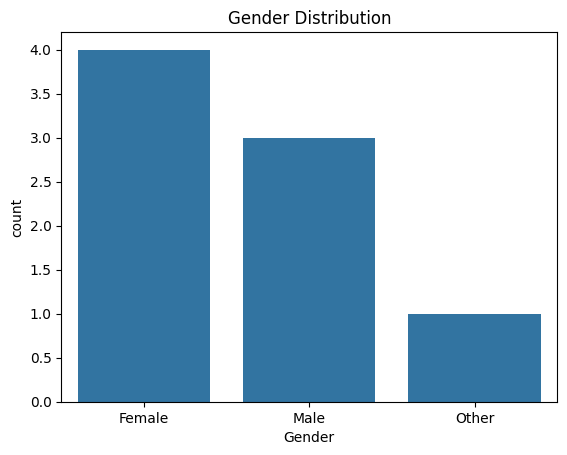

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

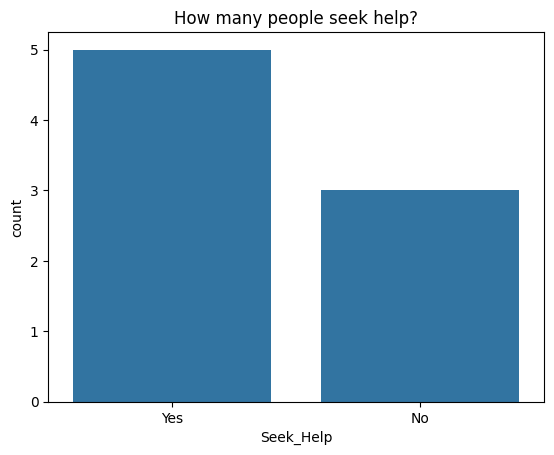

In [ ]:
# count seek help
sns.countplot(x='Seek_Help', data = df)
plt.title('How many people seek help?')
plt.show()

Most respondents chose to seek help. This could indicate awareness.

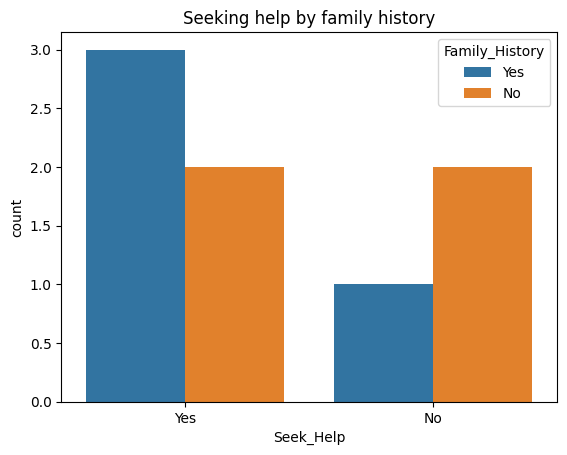

In [ ]:
# Seek Help vs Family History

sns.countplot(x='Seek_Help', hue='Family_History', data = df)
plt.title('Seeking help by family history')
plt.show()

Those with a family history of mental illness are more likely to seek help.

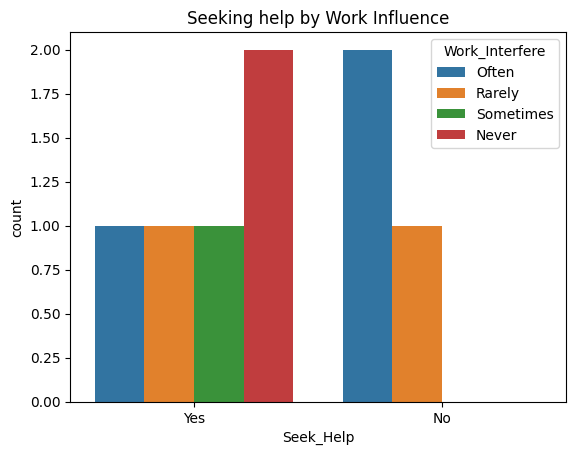

In [ ]:
# Seek Help vs work interference
sns.countplot(x='Seek_Help', hue = 'Work_Interfere', data = df)
plt.title('Seeking help by Work Influence')
plt.show()

Some respondents who reported no work interference still sought help, while others facing frequent interference did not — highlighting
a possible gap in awareness or access to support.

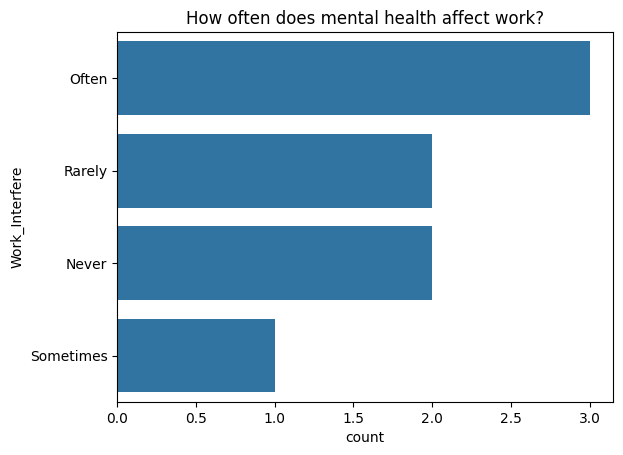

In [ ]:
# Mental Health affect on Work
sns.countplot(y='Work_Interfere', data = df, order=df['Work_Interfere'].value_counts().index)
plt.title("How often does mental health affect work?")
plt.show()

Most respondents report that mental health often affects their work, indicating its significant impact on productivity.

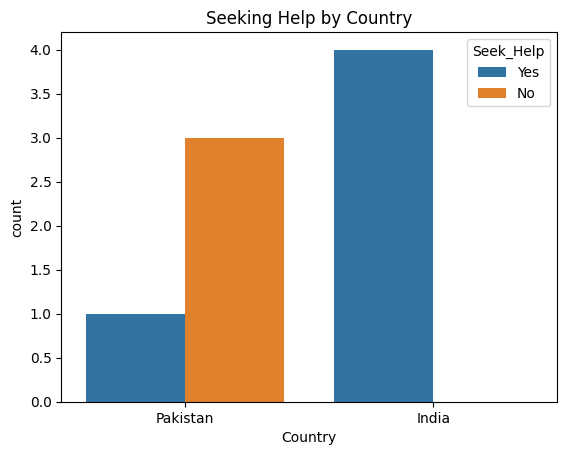

In [ ]:
sns.countplot(x='Country', hue='Seek_Help', data=df)
plt.title('Seeking Help by Country')
plt.show()

A higher proportion of respondents from India seek help for mental health compared to those from Pakistan, which may
reflect differences in awareness, access, or stigma

**Takeaway: Visuals help see patterns, and models help use them for decisions or predictions.**

# **Predictive Modelling**

### **Data Cleaning and Preprocessing**

**Objective: Prepare the dataset so that it’s clean, numerical, and ready for modeling.**

**Step 1: See how many missing values each column has**.

If just a few values are missing, you can:

Drop those rows → df.dropna()

Or fill with a placeholder like 'Unknown' or the column’s most frequent value (for categorical), or mean/median (for numeric).
Fill with 'Unknown':

df['Gender'] = df['Gender'].fillna('Unknown')

Fill with Most Frequent Value:

most_common = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(most_common)

For Numeric Columns (e.g. Age)
➤ Fill with Mean:
df['Age'] = df['Age'].fillna(df['Age'].mean())
➤ Fill with Median:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [ ]:
df.isnull().sum()

NameError: name 'df' is not defined

**Step 2: Encode Categorical Variables**
Convert all non-numeric (text) columns into numeric format using one-hot encoding, so that the logistic regression model can understand them.

This will:
Create new columns like Gender_Male, Work_Interfere_Often

Turn "Yes/No" into 1s and 0s

drop_first=True avoids multicollinearity (duplicate info). The column(entry) that gets dropped is based on alphabetical order, not row order. And the entry that's removed wont have the column assigned in the new encoded dataset.

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# **Feature and Label Separation**

Define Features (X) and Target (y)**

🔍 Why?
You must clearly define:

What are the inputs (features) you’re using to predict?

What is the output (target) you want to predict?

You want to predict whether someone seeks help (i.e. Seek_Help_Yes column —— 1 = seeks help, 0 = does not).

So:

X = All other columns (inputs)

y = Seek_Help_Yes (target)





In [ ]:
X = df_encoded.drop('Seek_Help_Yes', axis = 1)
y = df_encoded['Seek_Help_Yes']
print(X.shape)
print(y.shape)
print(X)
print(y)

In [ ]:
df.shape

# **Train-Test Split**

Split Data into Train and Test**

Training data → the model learns from this

Testing data → we check how well it performs on unseen data

20% of the data goes to testing, 80% to training

random_state=42 → ensures reproducibility (you get the same split every time)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(X_train)

# **Modeling**

## **Logistic Regression**

This is the model we’ll use to predict Seek_Help_Yes (0 or 1):

fit() means train the model on the training data.

In [ ]:
# import and train the model
from sklearn.linear_model import LogisticRegression

modellr = LogisticRegression()

modellr.fit(X_train, y_train)

# Now that the model is trained, let’s make predictions on the test data
y_pred = modellr.predict(X_test)

# print predications
print("y_test (actual):", y_test.values)
print("y_pred (predicted):", y_pred)

y_test (actual): [False  True]
y_pred (predicted): [ True False]


**Last step: Evaluate the Model**

We’ll now check how well the model did by calculating:

Accuracy

Confusion matrix

Classification report

 1. Precision

  Out of all the times the model predicted "Yes", how many were actually Yes?
  
    Example:
  If the model said "Yes" 10 times, and only 6 were truly Yes, precision = 6/10 = 0.6

 2. Recall:

 Out of all the actual Yes answers, how many did the model correctly find?

 This is important in healthcare or safety — like, how many sick people did we actually catch?

 3. F1-Score

  It’s the balance between Precision and Recall.

  If both precision and recall are high → F1 will be high.

  If either one is low → F1 gets pulled down.

 4. Support
  
  How many actual examples were in each class?

In summary:

Precision -	Of predicted positives, how many were correct?

Recall	- Of actual positives, how many were caught?

F1-score	- How balanced are precision & recall?

Support	- How many true examples were there in this class?

Accuracy	- Overall, how many predictions were right?

**Macro Average:**

"Let’s give both classes equal importance."
Even though B had more students, we treat both classes equally.

**Weighted Average**

"Let’s give more weight to the class with more students."

Class B has more people, so it pulls the average down.

Use weighted average in most practical cases,
but pay attention to macro average when fairness between classes matters.

Use weighted avg by default, and look at macro when fairness or underrepresented groups matter.
Eg: Healthcare, justice, ethics cases	Sometimes Macro 🟢	Even if classes are imbalanced, each case (e.g., disease vs no disease) deserves equal concern.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Confusion Matrix:
 [[0 1]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       1.0
        True       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



✅ How to Compare When There Are Many Rows

Use a DataFrame to Compare

import pandas as pd

comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df)

Bonus Tip: Highlight Mistakes

If you want to quickly spot errors:

comparison_df['Match'] = comparison_df['Actual'] == comparison_df['Predicted']
print(comparison_df)

## **Decision Tree Classifier**

In [ ]:
# import and train the model
from sklearn.tree import DecisionTreeClassifier

modelTree = DecisionTreeClassifier(random_state=42)

modelTree.fit(X_train, y_train)

# Now that the model is trained, let’s make predictions on the test data
y_pred1 = modelTree.predict(X_test)

# print predications
print("y_test (actual):", y_test.values)
print("y_pred (predicted):", y_pred1)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, zero_division=0))

y_test (actual): [False  True]
y_pred (predicted): [ True  True]
Decision Tree Results:
Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



We used zero_division = 0
Its because, the output was giving an error -- precision couldn't be calculated properly because one class was never predicted.
This happens when:

You have a class (True/False) in your actual data,

But your model didn't predict that class at all.

So when it tries to compute precision (TP / (TP + FP)), it becomes something like 0 / 0, which is undefined.

So zero_division was used to safely supress the warning.

## **Random Forest**

In [ ]:
# import and train the model
from sklearn.ensemble import RandomForestClassifier

modelRF   = RandomForestClassifier(random_state=42)

modelRF.fit(X_train, y_train)

y_pred2 = modelRF.predict(X_test)

print('actual y_test', y_test.values)
print('y_prediction', y_pred2)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2, zero_division=0))


actual y_test [False  True]
y_prediction [ True  True]
Random Forest Results:
Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



## **K Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier()

modelKNN.fit(X_train, y_train)

y_pred3 = modelKNN.predict(X_test)

print('actual y_test', y_test.values)
print('y_prediction', y_pred3)

print("K Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3, zero_division=0))

actual y_test [False  True]
y_prediction [ True  True]
K Neighbors:
Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [ ]:
from sklearn.svm import SVC

modelsvc = SVC()

modelsvc.fit(X_train, y_train)

y_pred4 = modelsvc.predict(X_test)

print('actual y_test', y_test.values)
print('y_prediction', y_pred4)

print("SVC:")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4, zero_division=0))


actual y_test [False  True]
y_prediction [ True  True]
SVC:
Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



## **Final Summary & Reflection**

In this notebook, I implemented several classification models — including Logistic Regression, KNN, Decision Tree, and SVM — to understand how they behave when applied to a small, real-world dataset related to mental health.

This exercise prioritized learning over performance, focusing on hands-on experience with a complete ML pipeline: from data inspection and preprocessing, to model training, evaluation, and interpretation.

**Key observations:**

- None of the models achieved very high performance. This was expected given the small dataset size, limited number of samples, and possible noise or imbalance in the data.
- It also strengthened my confidence in using scikit-learn’s workflows and interpreting metrics like accuracy, precision, recall, and f1-score.

> ⚠️ **Note:** The dataset is intentionally small — the goal here was not to optimize results, but to practice the end-to-end ML process and build a strong foundation for future, more complex projects.